In [ ]:
#NOTE: Below model is tune according to Edureka lab but actually run on standard laptop 

### Load data using PySpark

In [1]:
import pandas as pd 
import numpy as np
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df=spark.sql("select * from labuser_database.census_adult_hive_edureka_1042728 ") # data extracted from hive
#You can also download data from hive on local computer and run on jupter note book


In [4]:
df = spark.read.csv('censusdata.csv')

### Perform Exploratory Data Analysis (EDA) and Data Cleaning based on the following

In [5]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)



In [7]:
num_features  = ['age', 'fnlwgt','capital_gain', 'education_num', 'capital_loss', 'hours_per_week']

In [9]:
df1 = df.toPandas() # getting in pandas for statistic

### a) Find the shape and schema of the dataset

In [7]:
n_records = df1.shape[0]
n_greater_50k = df1[df1['income']=='>50K'].shape[0]
n_lessOrEqual_50k = df1[df1['income']=='<=50K'].shape[0]
greater_percent = (float(n_greater_50k)/n_records)*100
print("Total number of records:{}".format(n_records))
print("Individual making more than $50,000: {}".format(n_greater_50k))
print("Individual making at most $50,000: {}".format(n_lessOrEqual_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records:92561
Individual making more than $50,000: 22153
Individual making at most $50,000: 70408
Percentage of individuals making more than $50,000: 23.933406078153865%


### b) Obtain insights (statistics) of different columns

In [8]:
df1.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,92561.000000,9.256100e+04,92561.000000,92561.000000,92561.000000,92561.000000
mean,38.518070,1.895424e+05,10.075237,1046.297485,87.933136,40.433086
std,13.622754,1.058131e+05,2.573215,7220.801270,404.321777,12.324731
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.780330e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.367840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df1.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,92561,92561,92561,92561,92561,92561,92561,92561,92561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,64746,29864,42489,11766,37345,79041,61878,82795,70408


### c) Obtain the Unique values of Categorical Columns 
### g) Obtain distinct values and their counts in categorical columns.


In [10]:
str_features = [t[0] for t in df.dtypes if t[1] == 'string']

for c in str_features:
    print(c)
    print(df1[c].value_counts())

workclass
Private             64746
Self-emp-not-inc     7266
Local-gov            5903
others               5070
State-gov            3663
Self-emp-inc         3149
Federal-gov          2704
Without-pay            38
Never-worked           22
Name: workclass, dtype: int64
education
HS-grad         29864
Some-college    20659
Bachelors       15282
Masters          4909
Assoc-voc        3974
11th             3424
Assoc-acdm       2931
10th             2608
7th-8th          1849
Prof-school      1622
9th              1460
12th             1253
Doctorate        1143
5th-6th           950
1st-4th           493
Preschool         140
Name: education, dtype: int64
marital_status
Married-civ-spouse      42489
Never-married           30614
Divorced                12385
Separated                3009
Widowed                  2807
Married-spouse-absen     1191
Married-AF-spouse          66
Name: marital_status, dtype: int64
occupation
Craft-repair         11766
Prof-specialty       11644
Exec-mana

### d) Check if any unwanted values are present in the data such as Null, ? or NaN

In [11]:
# Number of null values
for i in df.columns:
    print(i,df.where(df[i].isNull()).count())

age 0
workclass 0
fnlwgt 0
education 0
education_num 0
marital_status 0
occupation 0
relationship 0
race 0
sex 0
capital_gain 0
capital_loss 0
hours_per_week 0
native_country 0
income 0


In [12]:
for col in df.columns:
    print(col, df.filter(df[col]=='NaN').count())

age 0
workclass 0
fnlwgt 0
education 0
education_num 0
marital_status 0
occupation 0
relationship 0
race 0
sex 0
capital_gain 0
capital_loss 0
hours_per_week 0
native_country 0
income 0


### e) Remove unwanted values if present in any of the columns (numerical as wellas categorical columns)
### Ans: Aready removed in data igestion process hive


### h)Create a crosstab on two different columns (example, age & workclass)

In [13]:
pd.crosstab(df1.workclass,df1.age)

age,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,...,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,90.0
workclass,,,,,,,,,,,,,,,,,,,,,
Federal-gov,2,11,16,26,4,30,38,37,22,38,...,0,0,0,0,0,0,0,0,0,4
Local-gov,36,24,23,36,28,55,101,101,123,140,...,1,0,0,0,7,0,0,0,0,11
Never-worked,2,11,0,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Private,888,1204,1573,1627,1642,1750,2147,1879,2008,1805,...,22,16,15,2,10,4,5,0,1,77
Self-emp-inc,14,23,8,7,2,15,14,13,35,27,...,0,2,6,6,1,0,0,0,0,0
Self-emp-not-inc,22,41,44,33,35,40,40,61,70,90,...,22,13,6,2,3,3,0,0,7,9
State-gov,7,28,53,63,82,75,84,85,67,78,...,0,4,0,0,0,0,0,0,0,0
Without-pay,0,0,5,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
others,163,270,311,321,251,221,131,96,102,66,...,16,23,18,3,7,0,0,3,0,25


In [14]:
pd.crosstab(df1.workclass, df1.income,margins=True, margins_name="Total")

income,<=50K,>50K,Total
workclass,,,
Federal-gov,1641,1063,2704
Local-gov,4178,1725,5903
Never-worked,22,0,22
Private,50732,14014,64746
Self-emp-inc,1405,1744,3149
Self-emp-not-inc,5169,2097,7266
State-gov,2674,989,3663
Without-pay,38,0,38
others,4549,521,5070


### j) Obtain correlation between the above columns using pandas scatter plot

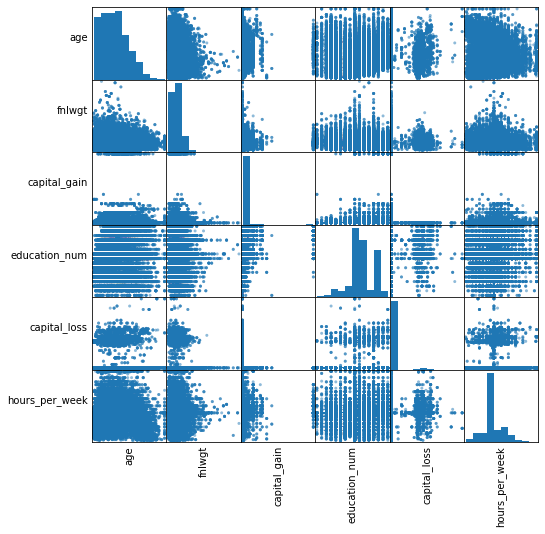

In [58]:
numeric_data = df.select(num_features).toPandas()


axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())



## 3. Data Preprocessing

In [10]:
from pyspark.sql.functions import *

df.first()

Row(age=22.0, workclass='Private', fnlwgt=148187.0, education='11th', education_num=7.0, marital_status='Never-married', occupation='Other-service', relationship='Other-relative', race='White', sex='Male', capital_gain=0.0, capital_loss=0.0, hours_per_week=40.0, native_country='United-States', income='<=50K')

In [11]:
df.groupby('native_country').agg({'native_country': 'count'}).sort(asc("count(native_country)")).show()

+--------------------+---------------------+
|      native_country|count(native_country)|
+--------------------+---------------------+
|  Holand-Netherlands|                    3|
|             Hungary|                   38|
|            Scotland|                   39|
|            Honduras|                   40|
|Outlying-US(Guam-...|                   44|
|            Cambodia|                   46|
|          Yugoslavia|                   46|
|     Trinadad&Tobago|                   50|
|            Thailand|                   52|
|                Hong|                   54|
|                Laos|                   55|
|             Ireland|                   68|
|             Ecuador|                   76|
|                Peru|                   83|
|           Nicaragua|                   97|
|              France|                  100|
|              Greece|                  102|
|                Iran|                  110|
|            Portugal|                  111|
|         

In [12]:
df_remove = df.filter(df["native_country"] !='Holand-Netherlands')

In [13]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
CATE_FEATURES = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
stages = [] # stages in our Pipeline
for categoricalCol in CATE_FEATURES:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCol=stringIndexer.getOutputCol(),outputCol=categoricalCol + "classVec")
    stages += [stringIndexer, encoder]

In [14]:
# Convert label into label indices using the StringIndexer
label_stringIdx =  StringIndexer(inputCol="income", outputCol="income_class")
stages += [label_stringIdx]

In [15]:
# List of continuous features
CONTI_FEATURES  = ['age', 'fnlwgt','capital_gain', 'education_num', 'capital_loss', 'hours_per_week']

In [16]:
assemblerInputs = [c + "classVec" for c in CATE_FEATURES] + CONTI_FEATURES
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

## Build the Pipeline to perform multiple tasks

In [17]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df_remove)
model = pipelineModel.transform(df_remove)

In [18]:
model.take(1)

[Row(age=22.0, workclass='Private', fnlwgt=148187.0, education='11th', education_num=7.0, marital_status='Never-married', occupation='Other-service', relationship='Other-relative', race='White', sex='Male', capital_gain=0.0, capital_loss=0.0, hours_per_week=40.0, native_country='United-States', income='<=50K', workclassIndex=0.0, workclassclassVec=SparseVector(8, {0: 1.0}), educationIndex=5.0, educationclassVec=SparseVector(15, {5: 1.0}), marital_statusIndex=1.0, marital_statusclassVec=SparseVector(6, {1: 1.0}), occupationIndex=5.0, occupationclassVec=SparseVector(14, {5: 1.0}), relationshipIndex=5.0, relationshipclassVec=SparseVector(5, {}), raceIndex=0.0, raceclassVec=SparseVector(4, {0: 1.0}), sexIndex=0.0, sexclassVec=SparseVector(1, {0: 1.0}), native_countryIndex=0.0, native_countryclassVec=SparseVector(40, {0: 1.0}), income_class=0.0, features=SparseVector(99, {0: 1.0, 13: 1.0, 24: 1.0, 34: 1.0, 48: 1.0, 52: 1.0, 53: 1.0, 93: 22.0, 94: 148187.0, 96: 7.0, 98: 40.0}))]

In [19]:
from pyspark.ml.linalg import DenseVector
input_data = model.rdd.map(lambda x: (x["income_class"], DenseVector(x["features"])))

In [20]:
df_train = spark.createDataFrame(input_data, ["label", "features"])

In [21]:
df_train.show(2)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[1.0,0.0,0.0,0.0,...|
|  0.0|[0.0,1.0,0.0,0.0,...|
+-----+--------------------+
only showing top 2 rows



### Split the dataset into two parts (80%-20%) as Train and Test Datasets

In [22]:
# Split the data into train and test sets
train_data, test_data = df_train.randomSplit([.8,.2],seed=1234)

In [28]:
train_data.groupby('label').agg({'label': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|       56290|
|  1.0|       17669|
+-----+------------+



In [29]:
test_data.groupby('label').agg({'label': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|       14115|
|  1.0|        4484|
+-----+------------+



In [23]:
from pyspark.ml.classification import LogisticRegression,NaiveBayes, RandomForestClassifier, DecisionTreeClassifier, GBTClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from time import *
evaluator = BinaryClassificationEvaluator()


###  LogisticRegression

In [24]:
log_reg = LogisticRegression(maxIter=5)

param_log_reg = ParamGridBuilder() \
    .addGrid(log_reg.regParam,[0.02, .08]) \
    .addGrid(log_reg.elasticNetParam,[0.2, 0.6]) \
    .build()
    
    
cv_lr = CrossValidator(estimator=log_reg,
                          estimatorParamMaps=param_log_reg,
                          evaluator=evaluator,
                          numFolds=3)


start_time = time()

lr_mod = cv_lr.fit(train_data)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

def measure_report(model): 
    predictions = model.transform(test_data)
    cm = predictions.select("label", "prediction")
    acc = float(cm.filter(cm.label == cm.prediction).count()) / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100))
    print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

start_time1 = time()    
measure_report(model = lr_mod)
end_time1 = time()
elapsed_time1 = end_time1 - start_time1
print("Time to train model: %.3f seconds" % elapsed_time1)

Time to train model: 712.209 seconds
Model accuracy: 83.171%
Test Area Under ROC: 0.8812191606287457
Time to train model: 230.911 seconds


###  RandomForestClassifier

In [25]:
random_forest = RandomForestClassifier()

param_random_forest = ParamGridBuilder()\
    .addGrid(random_forest.numTrees,[20,50,100])\
    .build()

cv_rf = CrossValidator(estimator=random_forest,
                          estimatorParamMaps=param_random_forest,
                          evaluator=evaluator,
                          numFolds=3)

start_time = time()

rf_mod = cv_rf.fit(train_data)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

def measure_report(model): 
    predictions = model.transform(test_data)
    cm = predictions.select("label", "prediction")
    acc = float(cm.filter(cm.label == cm.prediction).count()) / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100))
    print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

    
start_time1 = time()    
measure_report(model = rf_mod)
end_time1 = time()
elapsed_time1 = end_time1 - start_time1
print("Time to test model: %.3f seconds" % elapsed_time1)

Time to train model: 865.585 seconds
Model accuracy: 82.375%
Test Area Under ROC: 0.8922351538891541
Time to train model: 230.198 seconds


###  NaiveBayes

In [26]:
naive_bayes = NaiveBayes()

param_naive_bayes = ParamGridBuilder()\
    .addGrid(naive_bayes.smoothing,[0.4,1.0])\
    .build()
    
cv_nb = CrossValidator(estimator=naive_bayes,
                          estimatorParamMaps=param_naive_bayes,
                          evaluator=evaluator,
                          numFolds=3)

start_time = time()

nb_mod = cv_nb.fit(train_data)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

def measure_report(model): 
    predictions = model.transform(test_data)
    cm = predictions.select("label", "prediction")
    acc = float(cm.filter(cm.label == cm.prediction).count()) / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100))
    print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

start_time1 = time() 
measure_report(model = nb_mod)
end_time1 = time()
elapsed_time1 = end_time1 - start_time1
print("Time to test model: %.3f seconds" % elapsed_time1)

Time to train model: 540.022 seconds
Model accuracy: 78.192%
Test Area Under ROC: 0.3668438148090917
Time to test model: 229.132 seconds


### DecisionTreeClassifier

In [29]:
# Create initial Decision Tree Model
dt = DecisionTreeClassifier(maxDepth=2)


param_dt = ParamGridBuilder()\
    .addGrid(dt.maxDepth, [2, 5, 10, 20, 30])\
    .addGrid(dt.maxBins, [10, 20, 40, 80, 100])\
    .build()


# Create 5-fold CrossValidator
cv_dt = CrossValidator(estimator = dt,
                      estimatorParamMaps = param_dt,
                      evaluator=evaluator,
                      numFolds = 3)

start_time = time()

dt_mod = cv_dt.fit(train_data)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

def measure_report(model): 
    predictions = model.transform(test_data)
    cm = predictions.select("label", "prediction")
    acc = float(cm.filter(cm.label == cm.prediction).count()) / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100))
    print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

    
start_time1 = time() 
measure_report(model = dt_mod)
end_time1 = time()
elapsed_time1 = end_time1 - start_time1
print("Time to test model: %.3f seconds" % elapsed_time1)

Time to train model: 993.109 seconds
Model accuracy: 96.532%
Test Area Under ROC: 0.9569120244278629
Time to train model: 235.352 seconds


###  GBTClassifier

In [ ]:
gbt = GBTClassifier(maxIter=10)


param_gbt = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv_gbt = CrossValidator(estimator=gbt, estimatorParamMaps=param_gbt, evaluator=evaluator, numFolds=5)


start_time = time()

gbt_mod = cv_gbt.fit(train_data)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

def measure_report(model): 
    predictions = model.transform(test_data)
    cm = predictions.select("label", "prediction")
    acc = float(cm.filter(cm.label == cm.prediction).count()) / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100))
    print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

    
start_time1 = time() 
measure_report(model = gbt_mod)
end_time1 = time()dx
elapsed_time1 = end_time1 - start_time1
print("Time to test model: %.3f seconds" % elapsed_time1)

Time to train model: 2866.209 seconds
Model accuracy: 86.585%
Test Area Under ROC: 0.9250472100115559
Time to test model: 431.895 seconds

#result generated in standard pc

#####  Conculustion : 
#### 1) Decision Tree Give hightest accuracy of 96.53 % with processing time of 983 sec